In [35]:
from training_utilities import *
from variables_to_specify_electricity import *

In [36]:
from darts.models import ExponentialSmoothing
import pandas as pd

In [37]:
df, columns_to_normalize, target_col, forecast_avg_target_col_name, avg_target_col_name, No_of_datapoints_in_one_day, start_date, end_date, delta, one_month_days, out_columns, drop_columnss, windows, index_of_one_month, one_month_window_size, date_col_name = variables_to_specify_electricity()


In [38]:
convert_time(df, date_col_name)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,year,month,hour,minute
0,1970-01-01,1,0.000000,0.044134,0.486909,0.003467,0.422915,0.414912,0,1970,1,0,0
1,1970-01-01,1,0.021277,0.044134,0.464296,0.003467,0.422915,0.414912,0,1970,1,0,0
2,1970-01-01,1,0.042553,0.044134,0.430824,0.003467,0.422915,0.414912,0,1970,1,0,0
3,1970-01-01,1,0.063830,0.043983,0.368343,0.003467,0.422915,0.414912,0,1970,1,0,0
4,1970-01-01,1,0.085106,0.043983,0.303184,0.003467,0.422915,0.414912,0,1970,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44107,1970-01-01,1,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,0,1970,1,0,0
44108,1970-01-01,1,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,0,1970,1,0,0
44109,1970-01-01,1,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,0,1970,1,0,0
44110,1970-01-01,1,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,1,1970,1,0,0


In [39]:
# compute daily average
# 24 datapoints in each day
daily_avg =[]
for i in range (0, len(df),No_of_datapoints_in_one_day):
  sub_df = df[i:i+No_of_datapoints_in_one_day]
  mean = sub_df[target_col].mean()
  daily_avg.append(mean)
daily_df_avg = pd.DataFrame(daily_avg, columns=[avg_target_col_name])
daily_df_avg

,nswprice_avg
0,0.058677
1,0.059153
2,0.055869
3,0.049308
4,0.049081
...,...
914,0.066576
915,0.071796
916,0.078907
917,0.074044


In [40]:
daily_df_avg.iloc[:, 1:]

""
0
1
2
3
4
...
914
915
916
917


In [41]:
dates_list = []
year_ls = []
month_ls = []
day_ls = []

while start_date <= end_date:
    date  = start_date.strftime("%Y-%m-%d")
    year, month, day = date.split('-')
    year_ls.append(int(year))
    month_ls.append(int(month))
    day_ls.append(int(day))
    # dates_list.append(date)
    start_date += delta

In [42]:
# drop the last row to make the number of rows equal (The calendar has one day less than our data)
daily_df_avg.drop(daily_df_avg.index[-1], inplace=True)

In [43]:
# daily_df_avg.drop(daily_df_avg.index[-1], inplace=True)
daily_df_avg['year'] = year_ls
daily_df_avg['month'] = month_ls
daily_df_avg['day'] = day_ls

In [44]:
# create seperate dataframe for each year in the dataset
years_ls = [1996, 1997, 1998]
index_ls = []
for year in (years_ls):
    if year == 1996:
        row_index = 0
    else:
        index = (daily_df_avg['year'] == year) & (daily_df_avg['month'] == 1) & (daily_df_avg['day'] == 1)
        row_index = index[index].index[0]
    index_ls.append(row_index)
index_ls.append(len(daily_df_avg))
print(index_ls)

years_df_ls = []
for i in range(0,len(index_ls)-1):
  one_year_df = daily_df_avg[index_ls[i]:index_ls[i+1]]
  years_df_ls.append(one_year_df)

print(len(years_df_ls))
# years_df_ls[0]


[0, 214, 579, 918]
3


In [45]:
years_df_ls[0]

,nswprice_avg,year,month,day
0,0.058677,1996,6,1
1,0.059153,1996,6,2
2,0.055869,1996,6,3
3,0.049308,1996,6,4
4,0.049081,1996,6,5
...,...,...,...,...
209,0.057352,1996,12,27
210,0.062297,1996,12,28
211,0.064407,1996,12,29
212,0.063127,1996,12,30


In [46]:
years_df_ls[1]

,nswprice_avg,year,month,day
214,0.060431,1997,1,1
215,0.055165,1997,1,2
216,0.069662,1997,1,3
217,0.074504,1997,1,4
218,0.074402,1997,1,5
...,...,...,...,...
574,0.027767,1997,12,27
575,0.025523,1997,12,28
576,0.025380,1997,12,29
577,0.037798,1997,12,30


In [47]:
years_df_ls[2]

,nswprice_avg,year,month,day
579,0.039344,1998,1,1
580,0.030529,1998,1,2
581,0.031962,1998,1,3
582,0.030055,1998,1,4
583,0.028163,1998,1,5
...,...,...,...,...
913,0.065108,1998,12,1
914,0.066576,1998,12,2
915,0.071796,1998,12,3
916,0.078907,1998,12,4


In [48]:
# daily_df_avg = cut_data(daily_df_avg)
# df = cut_data(df)

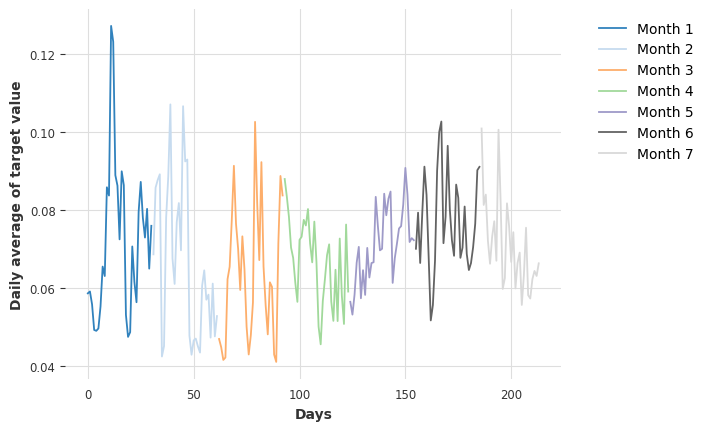

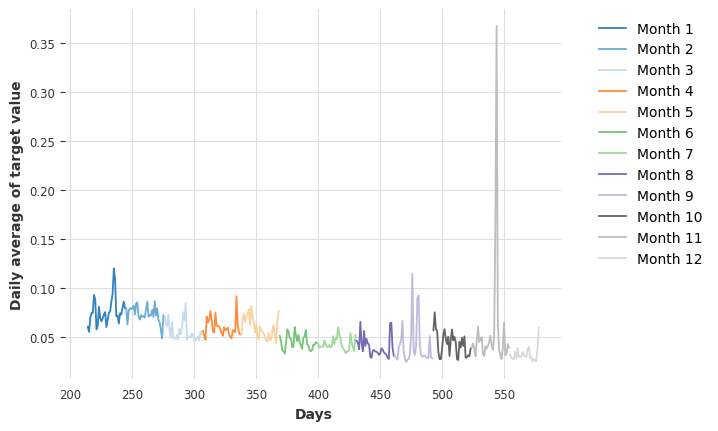

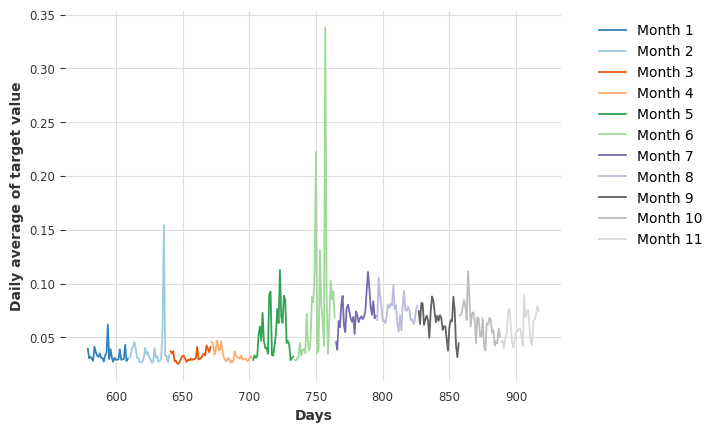

In [49]:
index = 0
for daily_df_avg2 in years_df_ls:
    plot_months_patterns(daily_df_avg2, one_month_days, avg_target_col_name, index)
    index+=1

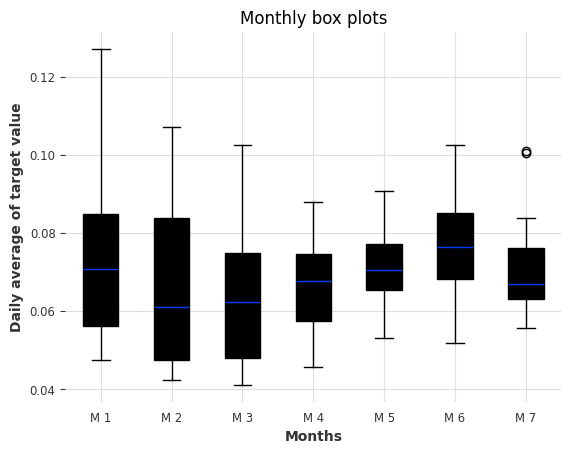

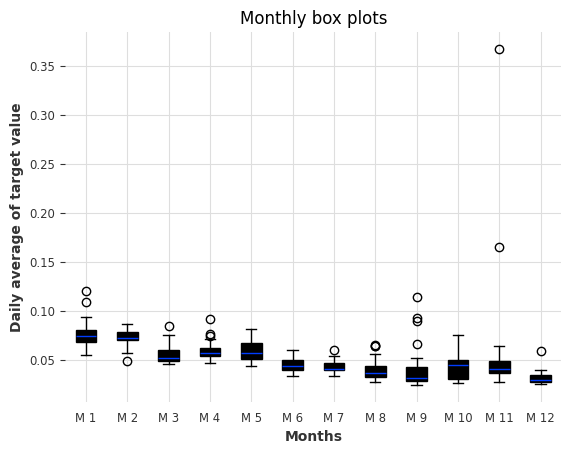

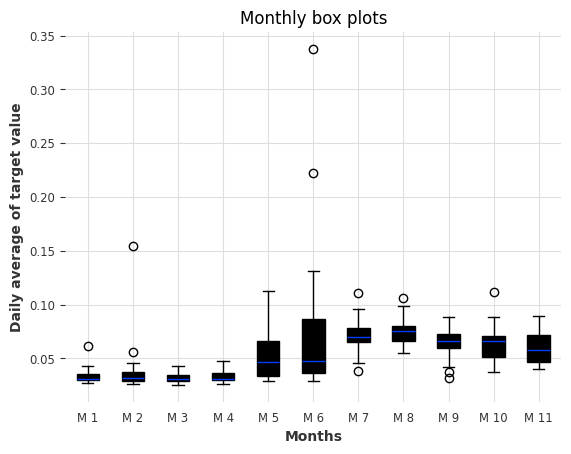

In [50]:
index = 0
for daily_df_avg2 in years_df_ls:
    plot_months_patterns_box(daily_df_avg2, one_month_days, avg_target_col_name, index)
    index+=1

In [51]:
daily_df_avg

,nswprice_avg,year,month,day
0,0.058677,1996,6,1
1,0.059153,1996,6,2
2,0.055869,1996,6,3
3,0.049308,1996,6,4
4,0.049081,1996,6,5
...,...,...,...,...
913,0.065108,1998,12,1
914,0.066576,1998,12,2
915,0.071796,1998,12,3
916,0.078907,1998,12,4


# Forecasting

In [52]:
ls_forecast_time = []
for b in range (0, len(daily_df_avg),one_month_days): 
    if b ==0:
        forecast_daily_avg = daily_df_avg[0:one_month_days]
        
        forecast_daily_avg = forecast_daily_avg.rename(columns={avg_target_col_name: forecast_avg_target_col_name})
        
        forecast_daily_avg1= forecast_daily_avg
        # start_forecasting_time = timeit.default_timer()
    else:
        forecast_daily_avg, forecast_time = forecast_es(daily_df_avg[0:b][avg_target_col_name], daily_df_avg[b:b+one_month_days][avg_target_col_name], forecast_daily_avg, forecast_avg_target_col_name)
        ls_forecast_time.append(forecast_time)
# end_forecasting_time = timeit.default_timer()
# forecasting_time = end_forecasting_time - start_forecasting_time
forecasting_time = sum(ls_forecast_time)
print("forecasting time is: ", forecasting_time)

forecast_daily_avg = forecast_daily_avg.drop(columns = ['year', 'month', 'day'])
forecast_daily_avg = pd.concat([forecast_daily_avg, daily_df_avg.iloc[:, 1:]], axis=1)
# 
# # print(forecast_daily_avg.iloc[61,3])
forecast_daily_avg

forecasting time is:  0.45908254299683904


,forecast_nswprice_avg,year,month,day
0,0.058677,1996,6,1
1,0.059153,1996,6,2
2,0.055869,1996,6,3
3,0.049308,1996,6,4
4,0.049081,1996,6,5
...,...,...,...,...
913,0.056153,1998,12,1
914,0.054608,1998,12,2
915,0.054449,1998,12,3
916,0.055835,1998,12,4


In [53]:
total_error = mean_squared_error(daily_df_avg[avg_target_col_name], forecast_daily_avg[forecast_avg_target_col_name])
print("total forecasting error is: ",total_error)

total forecasting error is:  0.0005919516380252265


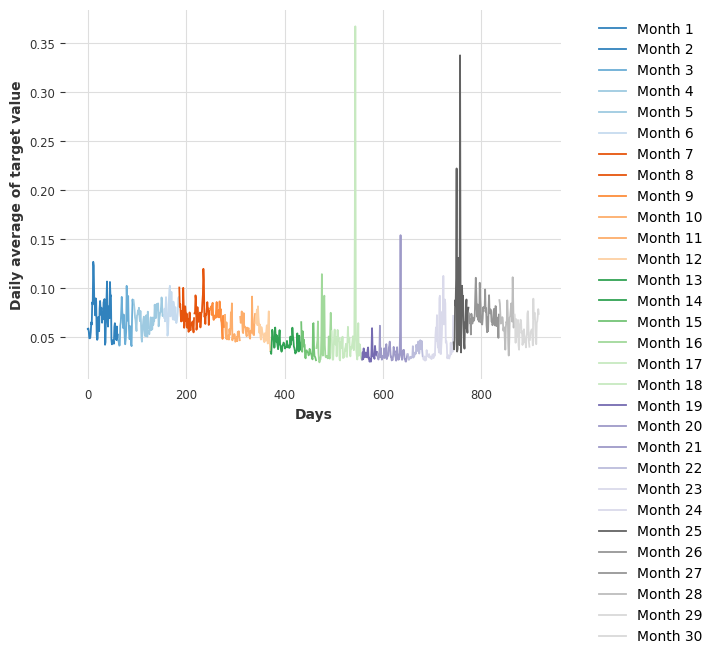

In [54]:
plot_months_patterns(daily_df_avg, one_month_days, avg_target_col_name,0)


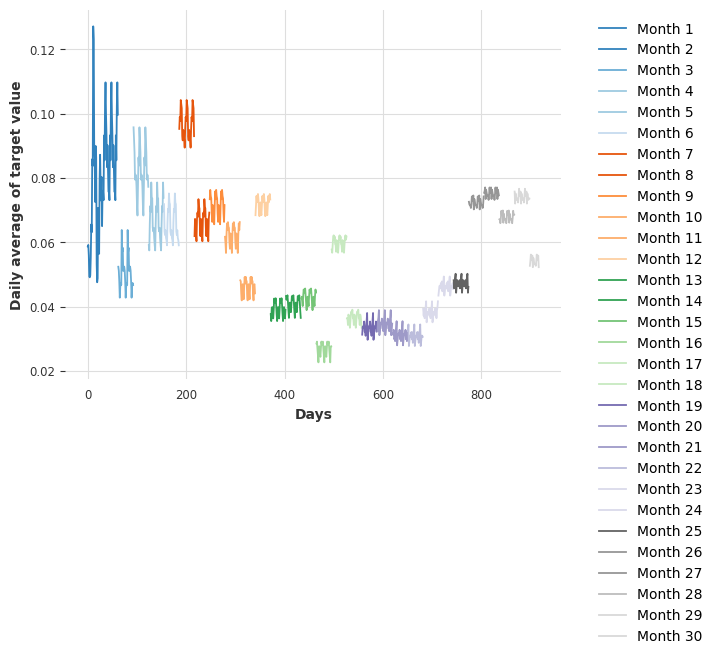

In [55]:
plot_months_patterns(forecast_daily_avg, one_month_days, forecast_avg_target_col_name,0)

# compute similarity

In [56]:
daily_df_avg

,nswprice_avg,year,month,day
0,0.058677,1996,6,1
1,0.059153,1996,6,2
2,0.055869,1996,6,3
3,0.049308,1996,6,4
4,0.049081,1996,6,5
...,...,...,...,...
913,0.065108,1998,12,1
914,0.066576,1998,12,2
915,0.071796,1998,12,3
916,0.078907,1998,12,4


In [57]:
daily_data_for_each_month = make_daily_data_for_each_month(daily_df_avg, avg_target_col_name, one_month_days)
daily_data_for_each_month

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_20,month_21,month_22,month_23,month_24,month_25,month_26,month_27,month_28,month_29
0,0.058677,0.075959,0.052860,0.083728,0.076279,0.072802,0.076503,0.060431,0.079390,0.057414,...,0.030790,0.032946,0.039459,0.027931,0.042890,0.065062,0.078333,0.066537,0.065055,0.056467
1,0.059153,0.068656,0.046993,0.087936,0.059133,0.072279,0.090193,0.055165,0.062731,0.048527,...,0.032086,0.027139,0.036107,0.029727,0.028707,0.102701,0.070933,0.062429,0.087799,0.042298
2,0.055869,0.085716,0.044887,0.083468,0.056510,0.070086,0.091045,0.069662,0.076858,0.072194,...,0.039213,0.033560,0.041022,0.032572,0.030609,0.085549,0.083600,0.064853,0.075510,0.046374
3,0.049308,0.087677,0.041635,0.078241,0.053232,0.079317,0.100865,0.074504,0.079439,0.070911,...,0.041586,0.036970,0.045873,0.030887,0.031927,0.092416,0.067647,0.075692,0.042380,0.044283
4,0.049081,0.089146,0.042247,0.070363,0.058372,0.066446,0.081298,0.074402,0.078411,0.062770,...,0.045735,0.034995,0.043586,0.028954,0.028972,0.068361,0.069969,0.079123,0.031552,0.058282
5,0.049689,0.042509,0.062303,0.067750,0.066526,0.079413,0.083946,0.092922,0.078967,0.060679,...,0.038499,0.037224,0.033600,0.033358,0.028505,0.045627,0.065960,0.074475,0.044478,0.050729
6,0.055339,0.045186,0.065479,0.061440,0.070574,0.091096,0.072081,0.088334,0.081848,0.072967,...,0.030426,0.027996,0.039574,0.030968,0.030576,0.038581,0.105745,0.062271,0.070368,0.045722
7,0.065525,0.078076,0.077357,0.056502,0.057419,0.083862,0.066241,0.057804,0.072925,0.056835,...,0.030494,0.028165,0.047155,0.032472,0.031519,0.065235,0.088875,0.081988,0.071486,0.046727
8,0.063099,0.088614,0.091310,0.072353,0.064610,0.068020,0.073198,0.061268,0.084180,0.049002,...,0.026549,0.025623,0.038344,0.052146,0.044616,0.059379,0.079684,0.081556,0.078062,0.039835
9,0.085826,0.107025,0.076474,0.073166,0.058279,0.051741,0.077127,0.080878,0.085312,0.065348,...,0.027195,0.025291,0.038118,0.060169,0.032944,0.080056,0.065007,0.061564,0.084699,0.050530


In [58]:
filtered_wess_similarity_dictionary = wasserstein_dist(daily_data_for_each_month)
new_filtered_wess_similarity_dictionary = convert_sim_to_month(filtered_wess_similarity_dictionary,1 )

column is :  month_0
column is :  month_1


column is :  month_2


column is :  month_3


column is :  month_4


column is :  month_5


column is :  month_6


column is :  month_7


column is :  month_8


column is :  month_9


column is :  month_10


column is :  month_11


column is :  month_12


column is :  month_13


column is :  month_14


column is :  month_15


column is :  month_16


column is :  month_17


column is :  month_18


column is :  month_19


column is :  month_20


column is :  month_21


column is :  month_22


column is :  month_23


column is :  month_24


column is :  month_25


column is :  month_26


column is :  month_27


column is :  month_28


column is :  month_29


{3: 0, 6: 4, 7: 5, 8: 5, 9: 2, 12: 9, 16: 12, 18: 14, 20: 18, 21: 19, 22: 19, 23: 15, 24: 17, 25: 6, 26: 5, 27: 3, 28: 2, 29: 9}
wess_similarity_time is:  0.10145237500000803
dictionary_1 is:  {4: 1, 7: 5, 8: 6, 9: 6, 10: 3, 13: 10, 17: 13, 19: 15, 21: 19, 22: 20, 23: 20, 24: 16, 25: 18, 26:

In [59]:
filtered_tvd_similarity_dictionary = tvd(daily_data_for_each_month)
new_filtered_tvd_similarity_dictionary = convert_sim_to_month(filtered_tvd_similarity_dictionary,1 )

tvd_similarity_time is : 0.0037951250014884863
{2: 0, 3: 1, 6: 3, 7: 4, 8: 5, 9: 2, 12: 9, 15: 13, 16: 13, 17: 13, 18: 14, 21: 19, 23: 13, 25: 4, 26: 5, 27: 8, 28: 11, 29: 12}
dictionary_1 is:  {3: 1, 4: 2, 7: 4, 8: 5, 9: 6, 10: 3, 13: 10, 16: 14, 17: 14, 18: 14, 19: 15, 22: 20, 24: 14, 26: 5, 27: 6, 28: 9, 29: 12, 30: 13}


final_similarities are:  {'M8, 1996': 'M6, 1996', 'M9, 1996': 'M7, 1996', 'M12, 1996': 'M9, 1996', 'M1, 1997': 'M10, 1996', 'M2, 1997': 'M11, 1996', 'M3, 1997': 'M8, 1996', 'M6, 1997': 'M3, 1997', 'M9, 1997': 'M7, 1997', 'M10, 1997': 'M7, 1997', 'M11, 1997': 'M7, 1997', 'M12, 1997': 'M8, 1997', 'M3, 1998': 'M1, 1998', 'M5, 1998': 'M7, 1997', 'M7, 1998': 'M10, 1996', 'M8, 1998': 'M11, 1996', 'M9, 1998': 'M2, 1997', 'M10, 1998': 'M5, 1997', 'M11, 1998': 'M6, 1997'}


In [60]:
from itertools import zip_longest
for idx, ((key_A, value_A), (key_B, value_B)) in enumerate(zip_longest(new_filtered_wess_similarity_dictionary.items(), new_filtered_tvd_similarity_dictionary.items()), start=1):
    key_B = key_B if key_B is not None else 'none'
    value_B = value_B if value_B is not None else 'none'
    print(f"{idx} & {key_A} & {value_A} & {key_B} & {value_B} \\\\")
    print("\\hline")

1 & M9, 1996 & M6, 1996 & M8, 1996 & M6, 1996 \\
\hline
2 & M12, 1996 & M10, 1996 & M9, 1996 & M7, 1996 \\
\hline
3 & M1, 1997 & M11, 1996 & M12, 1996 & M9, 1996 \\
\hline
4 & M2, 1997 & M11, 1996 & M1, 1997 & M10, 1996 \\
\hline
5 & M3, 1997 & M8, 1996 & M2, 1997 & M11, 1996 \\
\hline
6 & M6, 1997 & M3, 1997 & M3, 1997 & M8, 1996 \\
\hline
7 & M10, 1997 & M6, 1997 & M6, 1997 & M3, 1997 \\
\hline
8 & M12, 1997 & M8, 1997 & M9, 1997 & M7, 1997 \\
\hline
9 & M2, 1998 & M12, 1997 & M10, 1997 & M7, 1997 \\
\hline
10 & M3, 1998 & M1, 1998 & M11, 1997 & M7, 1997 \\
\hline
11 & M4, 1998 & M1, 1998 & M12, 1997 & M8, 1997 \\
\hline
12 & M5, 1998 & M9, 1997 & M3, 1998 & M1, 1998 \\
\hline
13 & M6, 1998 & M11, 1997 & M5, 1998 & M7, 1997 \\
\hline
14 & M7, 1998 & M12, 1996 & M7, 1998 & M10, 1996 \\
\hline
15 & M8, 1998 & M11, 1996 & M8, 1998 & M11, 1996 \\
\hline
16 & M9, 1998 & M9, 1996 & M9, 1998 & M2, 1997 \\
\hline
17 & M10, 1998 & M8, 1996 & M10, 1998 & M5, 1997 \\
\hline
18 & M11, 1998 & M3,

In [61]:
forecasted_daily_data_for_each_month = make_daily_data_for_each_month(forecast_daily_avg, forecast_avg_target_col_name, one_month_days)

In [62]:
forecasted_daily_data_for_each_month

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_20,month_21,month_22,month_23,month_24,month_25,month_26,month_27,month_28,month_29
0,0.058677,0.075959,0.099659,0.046695,0.080565,0.078567,0.061338,0.102956,0.060301,0.076253,...,0.036234,0.032210,0.030573,0.039668,0.047268,0.050180,0.070632,0.076319,0.067578,0.073762
1,0.059153,0.075821,0.052368,0.095718,0.077219,0.073811,0.060651,0.101645,0.067248,0.074333,...,0.033236,0.033257,0.032074,0.041621,0.045458,0.044290,0.071882,0.075410,0.069767,0.073170
2,0.055869,0.073069,0.051151,0.091947,0.059073,0.071822,0.059029,0.092966,0.069203,0.073600,...,0.033325,0.035443,0.029792,0.035093,0.047791,0.046106,0.074230,0.074573,0.068389,0.073558
3,0.049308,0.093197,0.047876,0.087870,0.057450,0.063322,0.095228,0.061888,0.073367,0.068915,...,0.032310,0.027939,0.031922,0.036606,0.044738,0.048237,0.072849,0.074482,0.068536,0.073596
4,0.049081,0.085469,0.042757,0.079469,0.065618,0.062233,0.098950,0.067238,0.076253,0.066306,...,0.035476,0.029567,0.028719,0.038289,0.047337,0.047749,0.073287,0.074489,0.069866,0.072344
5,0.049689,0.102362,0.046102,0.080994,0.071238,0.063739,0.097673,0.065194,0.074333,0.071537,...,0.036588,0.031178,0.031681,0.038279,0.047682,0.046337,0.074538,0.073140,0.066065,0.074367
6,0.055339,0.109691,0.047329,0.080565,0.069358,0.061338,0.104201,0.062422,0.073600,0.061675,...,0.038867,0.031645,0.032438,0.037743,0.049326,0.047368,0.070198,0.074709,0.068838,0.076616
7,0.065525,0.099659,0.046695,0.077219,0.078567,0.060651,0.102956,0.060301,0.068915,0.059632,...,0.031089,0.031190,0.034422,0.039294,0.043403,0.046206,0.073444,0.077025,0.067500,0.074510
8,0.063099,0.093157,0.063790,0.071363,0.073811,0.059029,0.101645,0.067248,0.066306,0.056650,...,0.032558,0.032746,0.027718,0.037153,0.044862,0.048170,0.072564,0.075368,0.067009,0.074514
9,0.085826,0.083341,0.056969,0.068304,0.073665,0.065901,0.092966,0.069203,0.071537,0.062179,...,0.034674,0.029867,0.029272,0.039273,0.046371,0.045655,0.071762,0.075872,0.067117,0.075738


In [63]:
forecasted_filtered_wess_similarity_dictionary = wasserstein_dist_forecasted(forecasted_daily_data_for_each_month,daily_data_for_each_month)
new_forecasted_filtered_wess_similarity_dictionary = convert_sim_to_month(forecasted_filtered_wess_similarity_dictionary, 1)

{3: 0, 5: 3, 8: 4, 9: 3, 11: 3, 12: 9, 16: 12, 17: 14, 18: 14, 21: 19, 22: 19, 23: 13, 24: 13, 25: 11, 26: 8, 27: 8, 28: 8, 29: 3}
wess_similarity_time is:  0.03643800000099873
dictionary_1 is:  {4: 1, 6: 4, 9: 5, 10: 4, 12: 4, 13: 10, 17: 13, 18: 15, 19: 15, 22: 20, 23: 20, 24: 14, 25: 14, 26: 12, 27: 9, 28: 9, 29: 9, 30: 4}


final_similarities are:  {'M9, 1996': 'M6, 1996', 'M11, 1996': 'M9, 1996', 'M2, 1997': 'M10, 1996', 'M3, 1997': 'M9, 1996', 'M5, 1997': 'M9, 1996', 'M6, 1997': 'M3, 1997', 'M10, 1997': 'M6, 1997', 'M11, 1997': 'M8, 1997', 'M12, 1997': 'M8, 1997', 'M3, 1998': 'M1, 1998', 'M4, 1998': 'M1, 1998', 'M5, 1998': 'M7, 1997', 'M6, 1998': 'M7, 1997', 'M7, 1998': 'M5, 1997', 'M8, 1998': 'M2, 1997', 'M9, 1998': 'M2, 1997', 'M10, 1998': 'M2, 1997', 'M11, 1998': 'M9, 1996'}


In [64]:
forecasted_filtered_tvd_similarity_dictionary = tvd_forecasted(forecasted_daily_data_for_each_month, daily_data_for_each_month)
new_forecasted_filtered_tvd_similarity_dictionary = convert_sim_to_month(forecasted_filtered_tvd_similarity_dictionary,1)

tvd_similarity_time is : 0.003800083000896848
{3: 0, 5: 3, 7: 3, 8: 4, 9: 3, 11: 4, 12: 9, 16: 10, 17: 14, 18: 14, 21: 19, 23: 13, 24: 13, 25: 4, 26: 8, 27: 8, 28: 4, 29: 11}
dictionary_1 is:  {4: 1, 6: 4, 8: 4, 9: 5, 10: 4, 12: 5, 13: 10, 17: 11, 18: 15, 19: 15, 22: 20, 24: 14, 25: 14, 26: 5, 27: 9, 28: 9, 29: 5, 30: 12}


final_similarities are:  {'M9, 1996': 'M6, 1996', 'M11, 1996': 'M9, 1996', 'M1, 1997': 'M9, 1996', 'M2, 1997': 'M10, 1996', 'M3, 1997': 'M9, 1996', 'M5, 1997': 'M10, 1996', 'M6, 1997': 'M3, 1997', 'M10, 1997': 'M4, 1997', 'M11, 1997': 'M8, 1997', 'M12, 1997': 'M8, 1997', 'M3, 1998': 'M1, 1998', 'M5, 1998': 'M7, 1997', 'M6, 1998': 'M7, 1997', 'M7, 1998': 'M10, 1996', 'M8, 1998': 'M2, 1997', 'M9, 1998': 'M2, 1997', 'M10, 1998': 'M10, 1996', 'M11, 1998': 'M5, 1997'}


In [65]:
for idx, (pair_A, pair_B) in enumerate(zip_longest(new_forecasted_filtered_wess_similarity_dictionary.items(), new_forecasted_filtered_tvd_similarity_dictionary.items()), start=1):
    key_A, value_A = pair_A
    if pair_B is not None:
        key_B, value_B = pair_B
    else:
        key_B, value_B = 'none', 'none'
    
    print(f"{idx} & {key_A} & {value_A} & {key_B} & {value_B} \\\\")
    print("\\hline")

1 & M9, 1996 & M6, 1996 & M9, 1996 & M6, 1996 \\
\hline
2 & M11, 1996 & M9, 1996 & M11, 1996 & M9, 1996 \\
\hline
3 & M2, 1997 & M10, 1996 & M1, 1997 & M9, 1996 \\
\hline
4 & M3, 1997 & M9, 1996 & M2, 1997 & M10, 1996 \\
\hline
5 & M5, 1997 & M9, 1996 & M3, 1997 & M9, 1996 \\
\hline
6 & M6, 1997 & M3, 1997 & M5, 1997 & M10, 1996 \\
\hline
7 & M10, 1997 & M6, 1997 & M6, 1997 & M3, 1997 \\
\hline
8 & M11, 1997 & M8, 1997 & M10, 1997 & M4, 1997 \\
\hline
9 & M12, 1997 & M8, 1997 & M11, 1997 & M8, 1997 \\
\hline
10 & M3, 1998 & M1, 1998 & M12, 1997 & M8, 1997 \\
\hline
11 & M4, 1998 & M1, 1998 & M3, 1998 & M1, 1998 \\
\hline
12 & M5, 1998 & M7, 1997 & M5, 1998 & M7, 1997 \\
\hline
13 & M6, 1998 & M7, 1997 & M6, 1998 & M7, 1997 \\
\hline
14 & M7, 1998 & M5, 1997 & M7, 1998 & M10, 1996 \\
\hline
15 & M8, 1998 & M2, 1997 & M8, 1998 & M2, 1997 \\
\hline
16 & M9, 1998 & M2, 1997 & M9, 1998 & M2, 1997 \\
\hline
17 & M10, 1998 & M2, 1997 & M10, 1998 & M10, 1996 \\
\hline
18 & M11, 1998 & M9, 1996

# model training


In [66]:
df = df.dropna().reset_index(drop=True)

# model_version1

## Periodical retraining

In [67]:
df = df.drop(range(1344)).reset_index(drop=True)
df

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,year,month,hour,minute
0,1970-01-01,1,0.000000,0.085565,0.541803,0.003467,0.422915,0.414912,1,1970,1,0,0
1,1970-01-01,1,0.021277,0.085565,0.506992,0.003467,0.422915,0.414912,1,1970,1,0,0
2,1970-01-01,1,0.042553,0.078209,0.477834,0.003467,0.422915,0.414912,1,1970,1,0,0
3,1970-01-01,1,0.063830,0.064519,0.415204,0.003467,0.422915,0.414912,0,1970,1,0,0
4,1970-01-01,1,0.085106,0.064519,0.351532,0.003467,0.422915,0.414912,0,1970,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42763,1970-01-01,1,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,0,1970,1,0,0
42764,1970-01-01,1,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,0,1970,1,0,0
42765,1970-01-01,1,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,0,1970,1,0,0
42766,1970-01-01,1,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,1,1970,1,0,0


In [68]:
# with_hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(1, df, windows, out_columns, target_col, drop_columnss)

sum_training_time_opt = ls_eval_df_periodic[index_of_min_testing_error]['training_time'].sum()
print('sum_training_time of optimal model is: ', sum_training_time_opt)

sum_training_time = ls_eval_df_periodic[index_of_one_month]['training_time'].sum()
print('sum_training_time of one monthly(monthly) model is: ', sum_training_time)

window size is :  240
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fi

In [43]:
# with_hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(1, df, [optimal_segment_number], out_columns, target_col, drop_columnss)


window size is :  1488
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.1s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   7.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_s

## random baseline

In [45]:
# random baseline
window = one_month_window_size
train = df[0:window] 
test = df[window:]

random_baseline(train, test, one_month_window_size, target_col, drop_columnss)

Average mse is:  0.006180459550591331


In [46]:
# _with_hptuning
# random baseline
window = one_month_window_size
train = df[0:window] 
test = df[window:]


# stationary model

In [48]:
# _with_hptuning
# train on first window (window = 4320)

window = one_month_window_size
train = df[0:window] 
test = df[window:]


# train = df[row_index_start:row_index_end] 
# test = df[row_index_end:]
eval_df_first_month, stationary_model1 = stationary_model_with_hptuning(train, test, one_month_window_size, 1, out_columns, target_col, drop_columnss)
# eval_df_first_month

sum_training_time_stat1 = eval_df_first_month['training_time'].sum()
print('sum_training_time is: ', sum_training_time_stat1)

print(eval_df_first_month['Testing Error'].mean())
print(eval_df_first_month['mae'].mean())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


total_time is:  5.182537249999768
sum_training_time is:  126.34888281599979
0.0015921862850450561
0.023189678379299535


In [50]:
# _with_hptuning

# train on optimal segment length (each window is 30 days = 4320)

if optimal_segment_number<one_month_window_size:
    multiplyer = optimal_segment_number/one_month_window_size
    print(multiplyer)
else:
    multiplyer = int(optimal_segment_number/one_month_window_size)
window = one_month_window_size
# train = df[0:round(multiplyer*window)] 
# test = df[round(multiplyer*window):]

train = df[0:optimal_segment_number] 
test = df[optimal_segment_number:]


eval_df_first_six_months, stationary_model3 = stationary_model_with_hptuning(train, test, one_month_window_size,1, out_columns, target_col, drop_columnss)
# eval_df_first_six_months

sum_training_time_stat3 = eval_df_first_six_months['training_time'].sum()
print('sum_training_time is: ', sum_training_time_stat3)


print(eval_df_first_six_months['Testing Error'].mean())
print(eval_df_first_six_months['mae'].mean())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


total_time is:  5.197266582999873
sum_training_time is:  126.84489674998986
0.0015921862850450561
0.023189678379299535


# model reuse

In [51]:
print("reduced number of retrainings is: ",count_reduced_retrainings(filtered_wess_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size ))

reduced number of retrainings is:  15


In [52]:
print("reduced number of retrainings is: ",count_reduced_retrainings(filtered_tvd_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size))

reduced number of retrainings is:  15


In [55]:
# _with_hptuning
eval_df_monthly_wess1 = model_reuse_with_hptuning(filtered_wess_similarity_dictionary, stationary_model1, 1, one_month_window_size, df, 1, False, target_col, drop_columnss)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_wess1 = eval_df_monthly_wess1[eval_df_monthly_wess1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
wess_stat1_train_time = filtered_eval_df_monthly_wess1['training_time'].sum()
print(f"Sum of training time': {wess_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


round(i / window) is :  2
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min

In [57]:
#_with_hptuning
eval_df_monthly_tvd1 = model_reuse_with_hptuning(filtered_tvd_similarity_dictionary, stationary_model1,1, one_month_window_size, df, 1, False, target_col, drop_columnss)

tvd_stat1_train_time = eval_df_monthly_tvd1['training_time'].sum()
print(tvd_stat1_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_tvd1 = eval_df_monthly_tvd1[eval_df_monthly_tvd1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
tvd_stat1_train_time = filtered_eval_df_monthly_tvd1['training_time'].sum()

# print(f"Sum of training time': {tvd_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_sampl

In [58]:
print("reduced number of retrainings is: ",count_reduced_retrainings(forecasted_filtered_wess_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size ))

print("reduced number of retrainings is: ",count_reduced_retrainings(forecasted_filtered_tvd_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size))

reduced number of retrainings is:  15
reduced number of retrainings is:  15


In [60]:
#_with_hptuning
eval_df_monthly_wess1 = model_reuse_with_hptuning(forecasted_filtered_wess_similarity_dictionary, stationary_model1, 1, one_month_window_size, df, 1, True, target_col, drop_columnss)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_wess1 = eval_df_monthly_wess1[eval_df_monthly_wess1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
wess_stat1_train_time = filtered_eval_df_monthly_wess1['training_time'].sum()
print(f"Sum of training time': {wess_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_dep

In [62]:
# _with_hptuning
eval_df_monthly_tvd1 = model_reuse_with_hptuning(forecasted_filtered_tvd_similarity_dictionary, stationary_model1,1, one_month_window_size, df, 1, True, target_col, drop_columnss)

tvd_stat1_train_time = eval_df_monthly_tvd1['training_time'].sum()
print(tvd_stat1_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_tvd1 = eval_df_monthly_tvd1[eval_df_monthly_tvd1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
tvd_stat1_train_time = filtered_eval_df_monthly_tvd1['training_time'].sum()

print(f"Sum of training time': {tvd_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_sample